In [45]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import warnings

# Filter out DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Set the path to the file you'd like to load
file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"johnsmith88/heart-disease-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())
df.shape

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
First 5 records:    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


(1025, 14)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

print("\nDataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nTarget distribution:")
print(df['target'].value_counts())

df.duplicated().sum()

df = df.drop_duplicates()
df.shape

X = df.drop(columns='target', axis=1)
Y = df['target']

df['target'].value_counts()


df.shape


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal       

(302, 14)

In [47]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

print(X.shape, X_train.shape, X_test.shape)

(302, 13) (241, 13) (61, 13)


In [48]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [49]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.8589211618257261
Accuracy on Test data :  0.8032786885245902


In [50]:

# Get predictions for the test set
X_test_prediction = model.predict(X_test)

# Print the classification report
print("\nClassification Report on Test Data:")
print(classification_report(Y_test, X_test_prediction))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



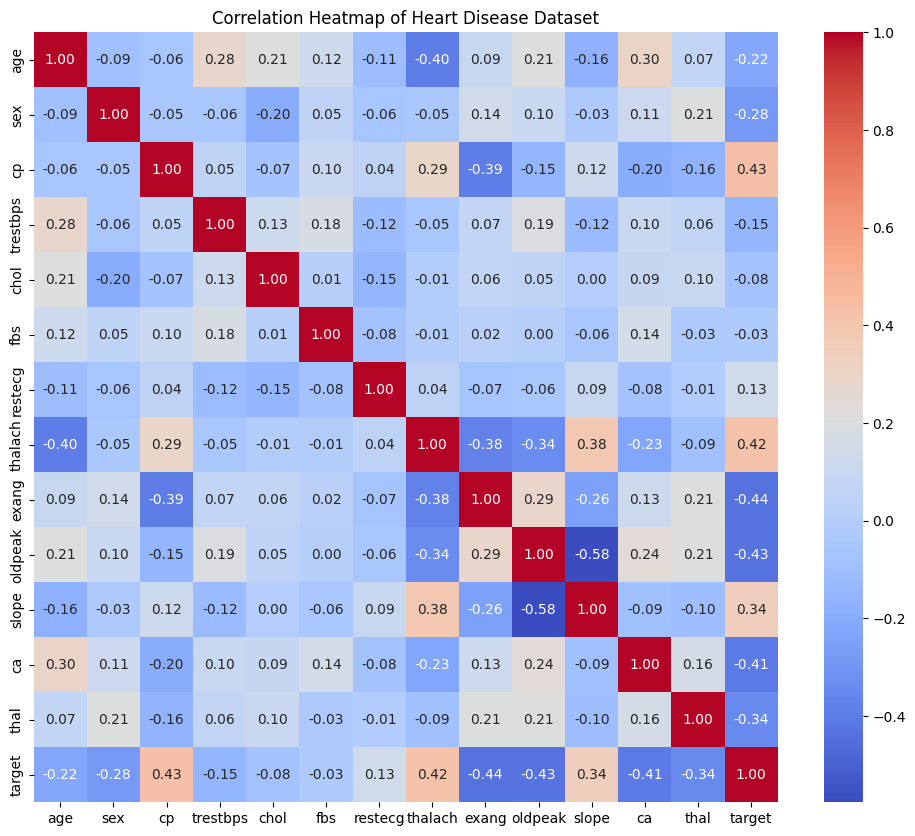

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()

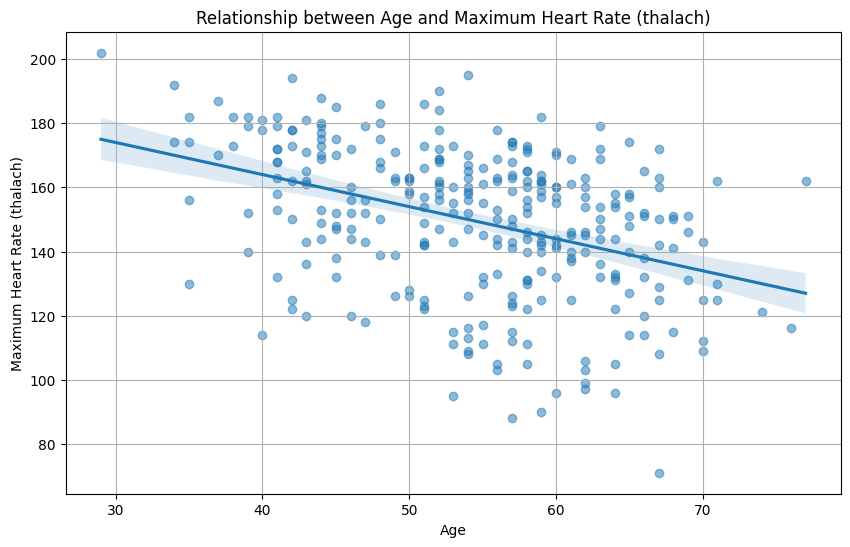

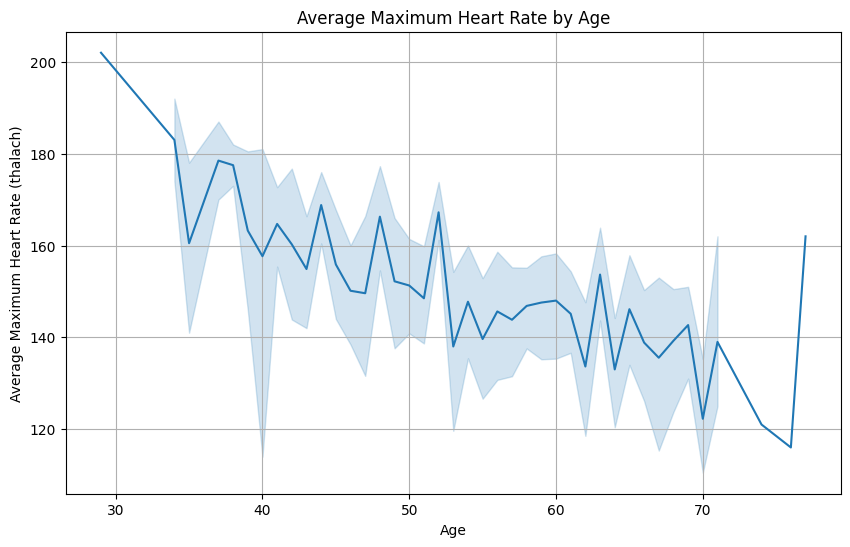

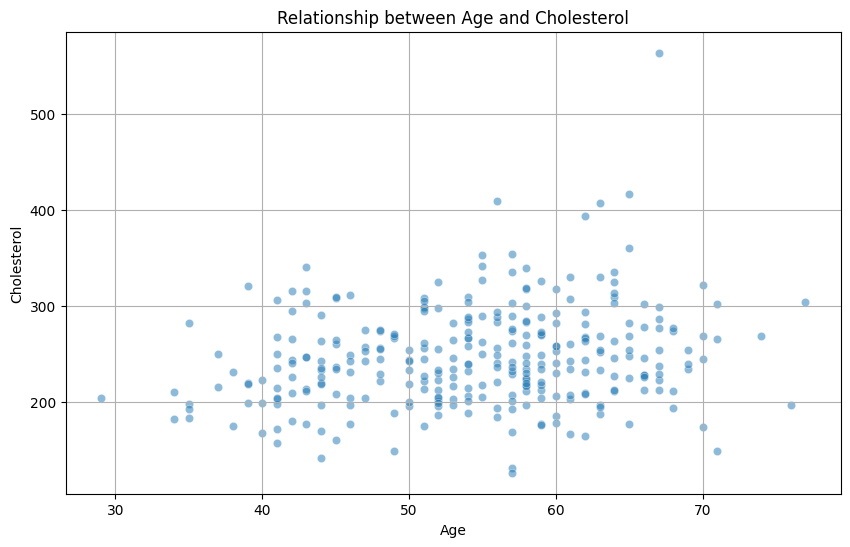

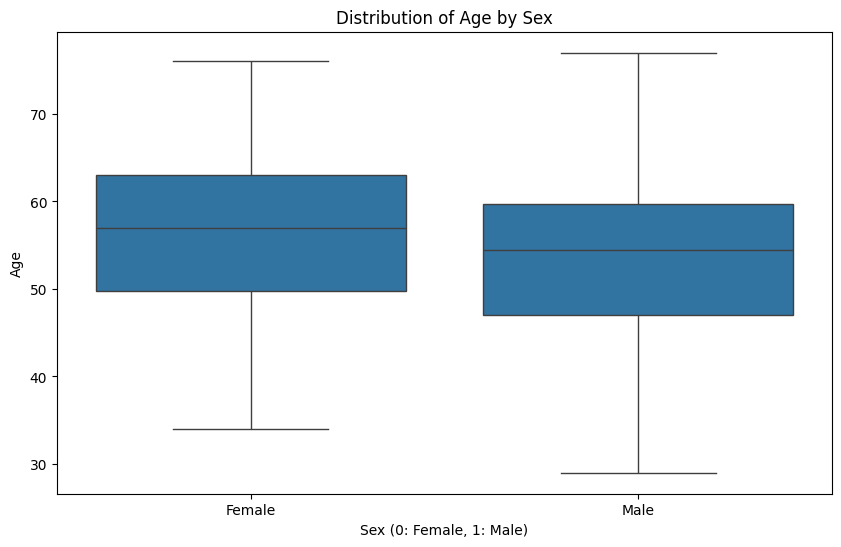

In [52]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='thalach', data=df, scatter_kws={'alpha':0.5})
plt.title('Relationship between Age and Maximum Heart Rate (thalach)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='thalach', data=df)
plt.title('Average Maximum Heart Rate by Age')
plt.xlabel('Age')
plt.ylabel('Average Maximum Heart Rate (thalach)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', data=df, alpha=0.5)
plt.title('Relationship between Age and Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df)
plt.title('Distribution of Age by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Age')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

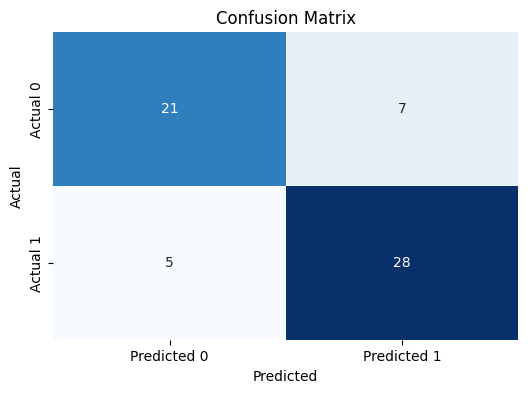

In [53]:

# Get predictions on the test set
X_test_prediction = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Get the coefficients of the model
feature_importance = model.coef_[0]

# Create a dictionary of feature names and their importance scores
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: abs(item[1]), reverse=True)

print("Feature Importance (Absolute Coefficient Values for Logistic Regression):")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

Feature Importance (Absolute Coefficient Values for Logistic Regression):
sex: -1.5875
cp: 0.9419
exang: -0.9021
thal: -0.8103
ca: -0.7068
slope: 0.4363
restecg: 0.3847
oldpeak: -0.3693
fbs: -0.2616
thalach: 0.0387
trestbps: -0.0217
age: 0.0150
chol: -0.0051


In [55]:

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Create a GridSearchCV object
# Increased max_iter to address ConvergenceWarning
grid_search = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, Y_test)
print("Test accuracy with best model:", test_accuracy)

Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.825765306122449
Test accuracy with best model: 0.7868852459016393
